## Project:Diabetes Diagnosis

## Dataset Overview

This dataset comprises the health and demographic data of 100,000 individuals, aimed at facilitating diabetes-related research and predictive modeling. Each row represents a single individual, and the dataset includes 16 columns with detailed health and demographic information. Below is a breakdown of the dataset'columns:

### **The data**
| Column                   | Description                                                                            |
|--------------------------|----------------------------------------------------------------------------------------|
| `year`                   | The year the data was collected (int)                                                  |
| `Gender`                 | The gender of the individual (Male/Female/Other)                                       |
| `Age`                    | The age of the individual (in years)                                                   |
| `Location`               | Geographic location or region where the individual resides                             |
| `race:AfricanAmerican`    | Binary indicator (0 or 1) for African American race                                    |
| `race:Asian`             | Binary indicator (0 or 1) for Asian race                                               |
| `race:Caucasian`         | Binary indicator (0 or 1) for Caucasian race                                           |
| `race:Hispanic`          | Binary indicator (0 or 1) for Hispanic race                                            |
| `race:Other`             | Binary indicator (0 or 1) for other races                                              |
| `Hypertension`           | Whether the individual has been diagnosed with hypertension (0 = No, 1 = Yes)          |
| `Heart Disease`          | Whether the individual has been diagnosed with heart disease (0 = No, 1 = Yes)         |
| `Smoking History`        | The individual's smoking history (Never, Former, Current)                              |
| `BMI`                    | Body Mass Index, a measure of body fat based on height and weight (kg/m²)              |
| `HbA1c Level`            | Hemoglobin A1c level, a measure of blood sugar control over the past 2-3 months (%)    |
| `Blood Glucose Level`    | Fasting blood glucose level (mg/dL)                                                    |
| `Diabetes`               | Whether the individual has been diagnosed with diabetes (0 = No, 1 = Yes)              |

This dataset is intended for use in diabetes-related research, enabling insights into potential risk factors, the prevalence of diabetes, and supportingf diabetes, and supporting predictive modeling.


## **Importing the Libraries and loading the Data and preprocessing the data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv('diabetes_dataset.csv')

In [4]:
data.head(10)

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
5,2016,Male,66.0,Alabama,0,0,1,0,0,0,0,not current,27.32,5.7,159,0
6,2015,Female,49.0,Alabama,0,0,1,0,0,0,0,current,24.34,5.7,80,0
7,2016,Female,15.0,Alabama,0,0,0,0,1,0,0,No Info,20.98,5.0,155,0
8,2016,Male,51.0,Alabama,1,0,0,0,0,0,0,never,38.14,6.0,100,0
9,2015,Male,42.0,Alabama,0,0,1,0,0,0,0,No Info,27.32,5.7,160,0


In [5]:
d=data.copy()
d.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [6]:
d.shape

(100000, 16)

In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [8]:
#Total number of records
n_records = d.shape[0]
#Number of records where individual are diabitic
diabitic = d['diabetes'].value_counts()[1]


#Number of records where individual are not diabitic
non_diabitic =d['diabetes'].value_counts()[0]


#Percentage of individuals who are diabitic
diabitic_percent = round((diabitic / n_records) * 100)

#Percentage of individuals who are not diabitic
non_diabitic_percent = round((non_diabitic / n_records) * 100)

#Print the results

print("Total number of records: {}".format(n_records))
print("Individuals which are diabitic: {}".format(diabitic))

print("Individuals which are not diabitic: {}".format(non_diabitic))
print("Percentage of individuals who are diabitic: {}%".format(diabitic_percent))
print("Percentage of individuals who are not diabitic: {}%".format(non_diabitic_percent))

Total number of records: 100000
Individuals which are diabitic: 8500
Individuals which are not diabitic: 91500
Percentage of individuals who are diabitic: 8%
Percentage of individuals who are not diabitic: 92%


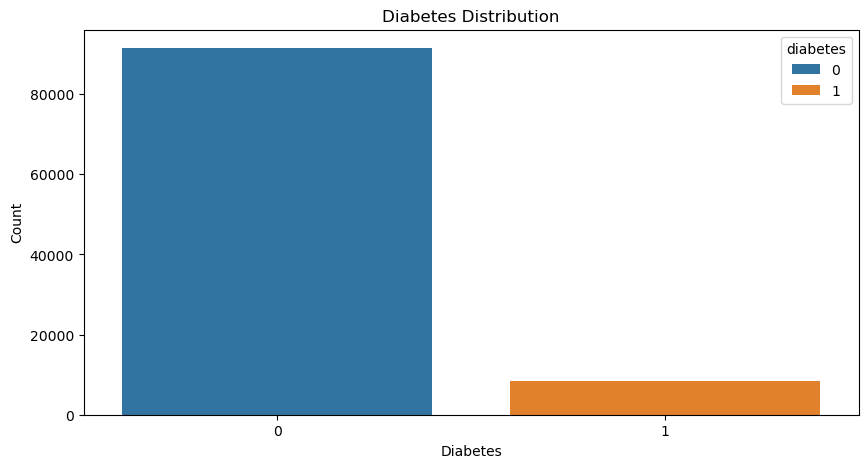

In [9]:
#Checking for Diabetes Distribution
fig = plt.figure(figsize=(10, 5))
sns.countplot(data=d, x='diabetes',hue='diabetes')
plt.title('Diabetes Distribution')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

* There is a problem in this dataset as there is an imbalance betewwen the two classes we want to predict as 92% of the people in the dataset are non-diabetic and only 8% of the people are diabetic which will represent a problem for the machine learning model to classify and detect this class. 

In [10]:
d['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

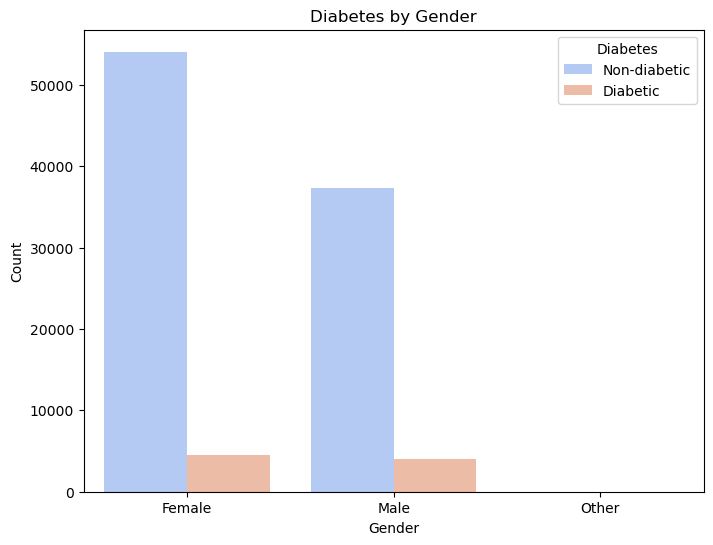

In [11]:
#Diabetes by Gender
plt.figure(figsize=(8,6))
sns.countplot(data=d,x='gender',hue='diabetes',palette='coolwarm')
plt.title('Diabetes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetes',labels=['Non-diabetic','Diabetic'])
plt.show()

In [12]:
other_d =d[d['gender']=='Other']
other_d

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
1611,2019,Other,23.0,Alabama,0,1,0,0,0,0,0,No Info,24.23,6.1,140,0
2550,2019,Other,19.0,Alaska,0,0,1,0,0,0,0,No Info,27.32,5.7,158,0
2787,2019,Other,39.0,Alaska,0,1,0,0,0,0,0,not current,31.24,6.2,85,0
4385,2015,Other,10.0,Arizona,1,0,0,0,0,0,0,not current,14.09,5.0,140,0
5064,2019,Other,10.0,Arizona,0,0,1,0,0,0,0,not current,16.59,6.1,160,0
7975,2019,Other,45.0,Arkansas,0,0,0,1,0,0,0,never,27.32,4.0,159,0
19647,2019,Other,47.0,Florida,0,0,1,0,0,0,0,never,36.76,6.6,90,0
19658,2019,Other,47.0,Florida,1,0,0,0,0,0,0,never,36.76,3.5,200,0
22784,2019,Other,53.0,Guam,0,0,1,0,0,0,0,No Info,27.32,6.6,160,0
32002,2019,Other,18.0,Iowa,0,0,1,0,0,0,0,not current,30.19,6.1,90,0


In [13]:
other_d.index

Index([ 1611,  2550,  2787,  4385,  5064,  7975, 19647, 19658, 22784, 32002,
       52722, 58482, 59534, 64571, 69173, 69763, 70701, 70863],
      dtype='int64')

In [14]:
d.drop(labels=[1611,2550,2787,4385,5064,7975,19647,19658,22784,32002,52722,58482,59534,64571,69173,69763,70701,70863],axis=0,inplace=True)

* Removing the other data in the gender column as none of them are diabetic despite some of them having high blood glucose level and hbA1c level than normal which leads to being diabetic but in the dataset they are not diabetic and Given that the "Other" category has only 18 rows and none of them are diabetic, it may be reasonable to remove this category from the analysis. This would simplify the dataset and focus on the more significant findings related to males and females, which have a larger sample size and relevant diabetic data.

In [15]:
#checking for duplicate data
duplicate_rows_data = d[d.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (14, 16)


In [16]:
d.drop_duplicates(inplace=True)
d.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [17]:
#Checking for amount of null values
d.isna().sum()

year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64

## **Balancing using sampling, cleaning the dataset and Gaining some key insights**

In [18]:
df_race = d[["race:AfricanAmerican", "race:Asian", "race:Caucasian", "race:Hispanic", "race:Other"]]
by_race = pd.from_dummies(df_race)
d = d.drop(columns = ["race:AfricanAmerican", "race:Asian", "race:Caucasian", "race:Hispanic", "race:Other"])
d.insert(2, "race", by_race)
d["race"] = d["race"].str.replace("race:", "")
d["race"] = d["race"].str.replace("AfricanAmerican", "African-American")

In [19]:
bins = [0, 18, 25, 35, 45, 55, 65, np.inf]
age_order = ["0-18", "18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
d.insert(3, "age_cat", pd.cut(d["age"], bins, labels = age_order))

In [20]:
bins = [0, 18.5, 25, 30, 35, 40, np.inf]
bmi_order = ["Underweight", "Normal", "Overweight", "Moderately Obese", "Severely Obese", "Morbidly Obese"]
d.insert(9, "bmi_cat", pd.cut(d["bmi"], bins, labels = bmi_order))

In [21]:
d["smoking_history"] = d["smoking_history"].str.title()
d = d[d["smoking_history"] != "No Info"]

In [22]:
columns = ['gender', 'race', 'age_cat', 'location', 'smoking_history', 'bmi_cat']

for col in columns:
    
    if col in ['gender', 'race', 'age_cat', 'location', 'smoking_history', 'bmi_cat']:
        d[col] = d[col].astype("category")

In [23]:
columns = list(d.columns)
new_name = [col.title() for col in columns]

for c, n in zip(columns, new_name):
    d = d.rename(columns = {c:n})

d = d.rename(columns = {"Age_Cat":"Age Group",
                            "Heart_Disease":"Heart Disease", 
                            "Smoking_History":"Smoking History",
                            "Bmi_Cat":"BMI Category",
                            "Bmi":"BMI",
                            "Hba1C_Level":"HbA1C Level",
                            "Blood_Glucose_Level":"Blood Glucose Level"
                           }
                )
d.head()

,Year,Gender,Race,Age Group,Age,Location,Hypertension,Heart Disease,Smoking History,BMI Category,BMI,HbA1C Level,Blood Glucose Level,Diabetes
0,2020,Female,Other,25-34,32.0,Alabama,0,0,Never,Overweight,27.32,5.0,100,0
1,2015,Female,Asian,25-34,29.0,Alabama,0,0,Never,Normal,19.95,5.0,90,0
2,2015,Male,Other,0-18,18.0,Alabama,0,0,Never,Normal,23.76,4.8,160,0
3,2015,Male,Caucasian,35-44,41.0,Alabama,0,0,Never,Overweight,27.32,4.0,159,0
4,2016,Female,African-American,45-54,52.0,Alabama,0,0,Never,Normal,23.75,6.5,90,0


In [24]:
diabetes_yes = d[d["Diabetes"] == 1]
diabetes_no = d[d["Diabetes"] == 0].sample(n = diabetes_yes.shape[0], ignore_index = True, random_state = 42)

sample = pd.concat([diabetes_yes, diabetes_no], axis = 0).reset_index(drop = True)

sample.head()

,Year,Gender,Race,Age Group,Age,Location,Hypertension,Heart Disease,Smoking History,BMI Category,BMI,HbA1C Level,Blood Glucose Level,Diabetes
0,2016,Female,Other,55-64,64.0,Alabama,0,0,Ever,Morbidly Obese,49.27,8.2,140,1
1,2016,Male,African-American,65+,80.0,Alabama,0,0,Former,Overweight,29.16,8.8,140,1
2,2016,Female,Other,35-44,42.0,Alabama,0,0,Current,Overweight,27.32,7.5,130,1
3,2016,Female,Hispanic,65+,80.0,Alabama,0,1,Never,Overweight,26.00,7.5,200,1
4,2015,Female,Caucasian,65+,79.0,Alabama,0,0,Never,Moderately Obese,30.84,5.8,220,1


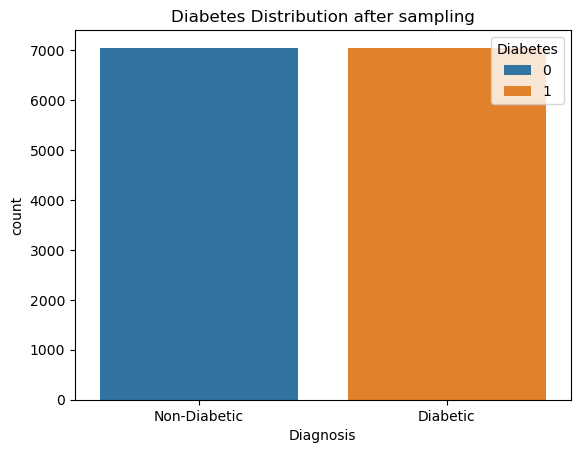

In [25]:
# Diabetes Distribution after sampling
d = sns.countplot(data = sample, x = "Diabetes",hue='Diabetes')
d.set_title("Diabetes Distribution after sampling")
d.set_xlabel("Diagnosis")
d.set_xticklabels(["Non-Diabetic", "Diabetic"])
plt.show()

In [26]:
d=sample.copy()

In [27]:
d.shape

(14092, 14)

In [28]:
d.groupby(['Diabetes']).aggregate({'Diabetes': 'count'})

,Diabetes
Diabetes,
0,7046
1,7046


* Creating balanced samples from the dataset to solve the imbalance problem in the dataset 

In [29]:
d.columns

Index(['Year', 'Gender', 'Race', 'Age Group', 'Age', 'Location',
       'Hypertension', 'Heart Disease', 'Smoking History', 'BMI Category',
       'BMI', 'HbA1C Level', 'Blood Glucose Level', 'Diabetes'],
      dtype='object')

In [30]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,14092.0,2018.342180,1.362640,2015.00,2019.00,2019.000,2019.0,2022.00
Age,14092.0,52.770551,18.720358,0.24,39.00,55.000,67.0,80.00
Hypertension,14092.0,0.167826,0.373725,0.00,0.00,0.000,0.0,1.00
Heart Disease,14092.0,0.090548,0.286975,0.00,0.00,0.000,0.0,1.00
BMI,14092.0,30.093620,7.278783,10.19,26.01,27.855,33.6,88.76
HbA1C Level,14092.0,6.158963,1.284128,3.50,5.70,6.100,6.6,9.00
Blood Glucose Level,14092.0,163.252768,56.601380,80.00,130.00,155.000,200.0,300.00
Diabetes,14092.0,0.500000,0.500018,0.00,0.00,0.500,1.0,1.00


**key insights**

* **Year**:This dataset includes year range from 2015-2022 with the the median year is 2019 with most data points.

* **age**:The age range is from 0 to 80 years, with a mean age of approximately 53 years.The median age is 55 years, indicating that half of the individuals are younger than 55 years and half are older.

* **Hypertension:**: Approximately 16.7% of individuals have hypertension.

* **Heart Disease**: Approximately 9% of individuals have heart disease.

* **BMI:**: The mean BMI is 30.10.The median BMI is approximately 28, indicating that half of the individuals have a BMI below this value
  BMI values range from 10.19 to 88.76.

* **HbA1c** : HbA1c levels range from 3.50 to 9.00.The median HbA1c level is 6.15.

* **Blood Glucose Level** :The mean blood glucose level is 163.25 mg/dL. The median blood glucose level is 155 mg/dL.
  Blood glucose levels range from 80 to 300 mg/dL.

* **Diabetes**: Approximately half of individuals in the dataset have diabetes.

## **Data visualization, EDA and analysis for the dataset**

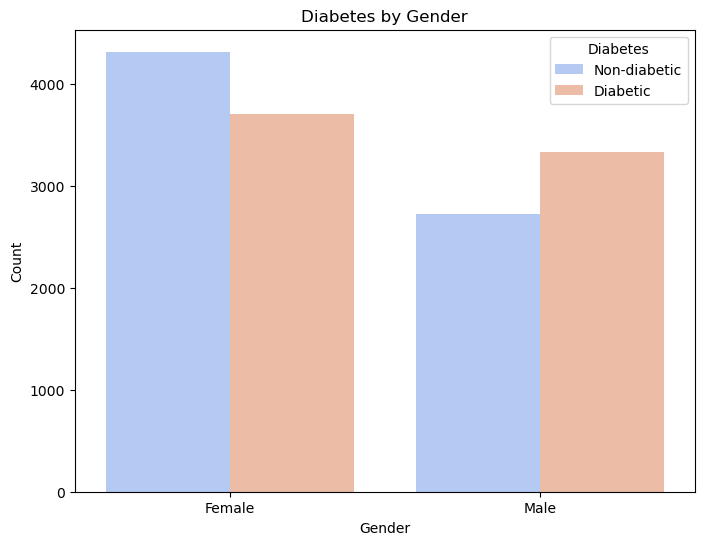

In [31]:
#Diabetes by Gender
plt.figure(figsize=(8,6))
sns.countplot(data=d,x='Gender',hue='Diabetes',palette='coolwarm')
plt.title('Diabetes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetes',labels=['Non-diabetic','Diabetic'])
plt.show()

In [32]:
d['Gender'].value_counts()

Gender
Female    8026
Male      6066
Name: count, dtype: int64

In [33]:
d.groupby(['Gender', 'Diabetes']).aggregate({'Gender': 'count'})

Gender
Gender Diabetes        
Female 0           4319
       1           3707
Male   0           2727
       1           3339

* In the **Gender** column There are more females than males in the dataset and the most of them are non-diabetic but there are also abig amount of them are diabetic but in the males it is the opposite as more men are diabetic than non-diabetic

In [34]:
#Checking for skewness in the data
d.skew(numeric_only=True)

Year                  -1.706704
Age                   -0.415654
Hypertension           1.777894
Heart Disease          2.853977
BMI                    1.248461
HbA1C Level            0.227882
Blood Glucose Level    0.852319
Diabetes               0.000000
dtype: float64

In [35]:
d.corr(numeric_only=True)['Diabetes']

Year                  -0.003646
Age                    0.442822
Hypertension           0.248180
Heart Disease          0.204752
BMI                    0.291726
HbA1C Level            0.603080
Blood Glucose Level    0.536568
Diabetes               1.000000
Name: Diabetes, dtype: float64

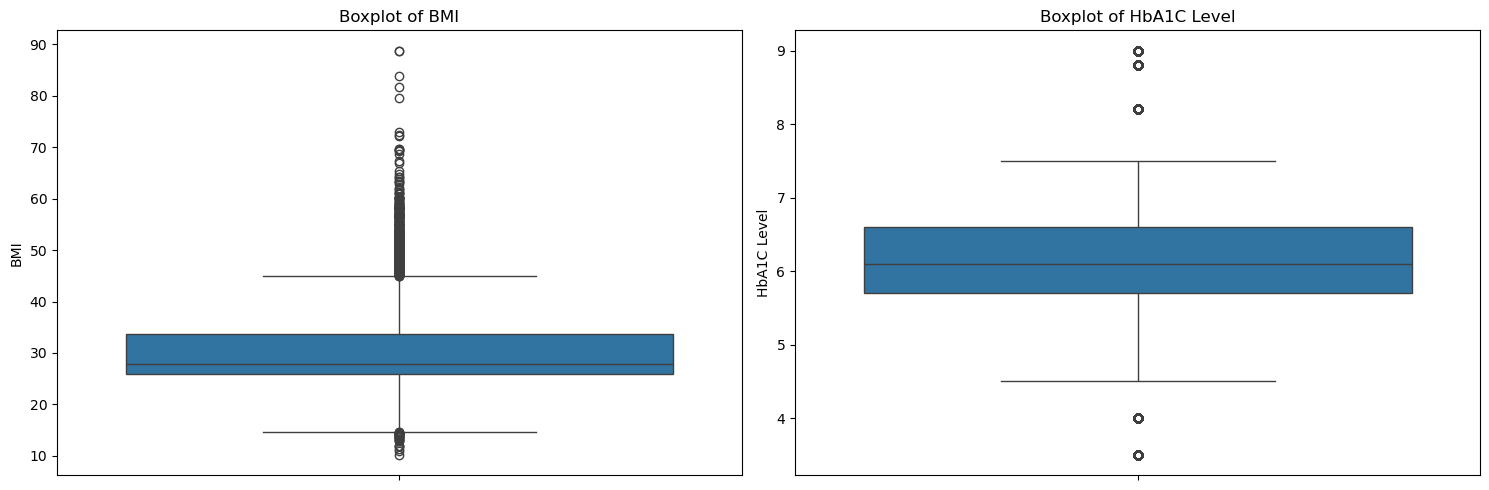

In [36]:
# Checking for outliers to remove them
columns = ['BMI', 'HbA1C Level']

fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))

for i, col in enumerate(columns):
    sns.boxplot(ax=axes[i], y=d[col])
    axes[i].set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()

plt.show()

In [37]:
# Removing the outliers
columns = ['BMI', 'HbA1C Level']

# Loop through each column
for col in columns:
    percentile25 = d[col].quantile(0.25)
    percentile75 = d[col].quantile(0.75)

    # IQR calculated for the column
    iqr = percentile75 - percentile25

    # Calculating upper and lower limit
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    # Removing outliers by clipping the values
    d[col] = np.clip(d[col], lower_limit, upper_limit)

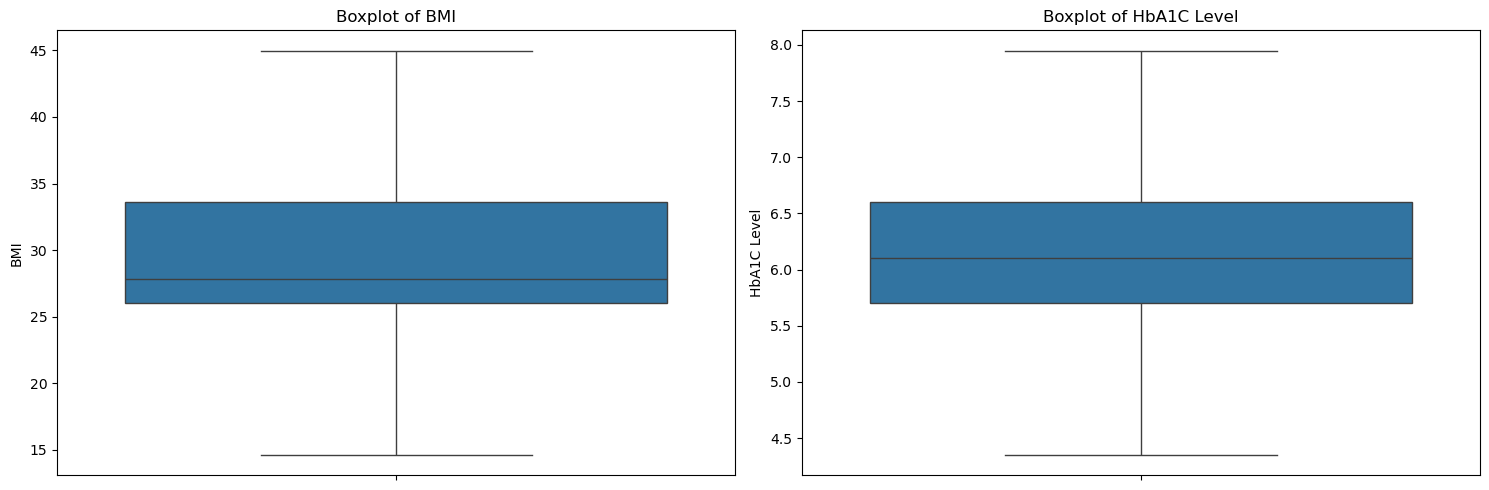

In [38]:
# checking columns boxplots to see them after outliers removal

columns = ['BMI', 'HbA1C Level']

# Create subplots with one row and as many columns as there are in the list
fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))

# Plot each column's boxplot in a separate subplot
for i, col in enumerate(columns):
    sns.boxplot(ax=axes[i], y=d[col])
    axes[i].set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()

plt.show()

In [39]:
#Checking for correlation of columns with Diabetes column
d.corr(numeric_only=True)['Diabetes']

Year                  -0.003646
Age                    0.442822
Hypertension           0.248180
Heart Disease          0.204752
BMI                    0.303235
HbA1C Level            0.622809
Blood Glucose Level    0.536568
Diabetes               1.000000
Name: Diabetes, dtype: float64

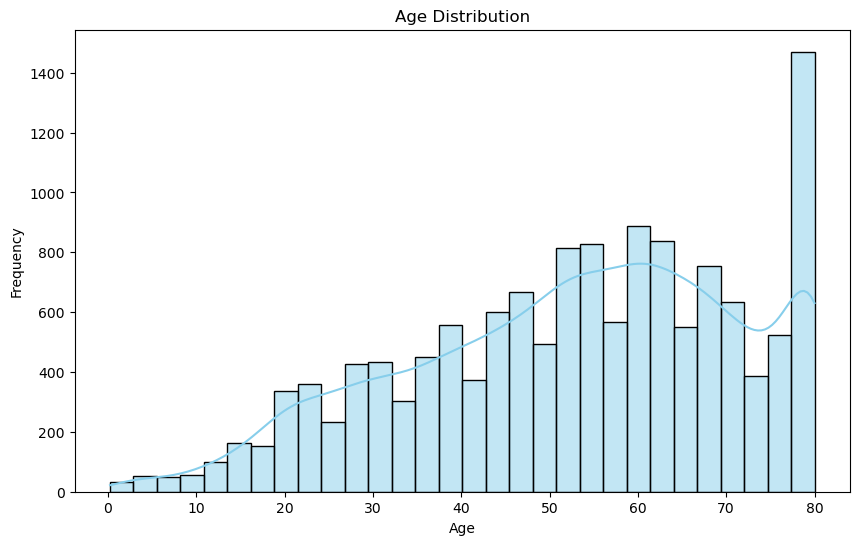

In [40]:
# Age Distribution across the dataset
plt.figure(figsize=(10,6))
sns.histplot(d['Age'], bins=30,kde=True,color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

* There is a noticeable increase in frequency in the younger age groups (0-20 years), followed by a more gradual increase in the middle age groups (20-60 years), and a sharp rise in the older age groups (60-80 years) The spike in the 80 age group may indicate a specific trend relating to being diabetic.

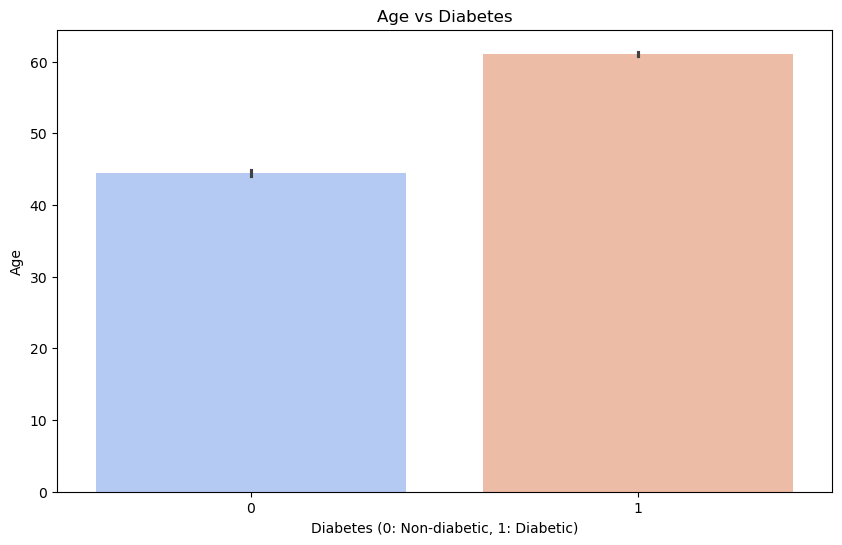

In [41]:
#Plotting age vs diabetes
plt.figure(figsize=(10, 6))
sns.barplot(x='Diabetes', y='Age', data=d, palette='coolwarm')
plt.title('Age vs Diabetes')
plt.xlabel('Diabetes (0: Non-diabetic, 1: Diabetic)')
plt.ylabel('Age')
plt.show()

* The average age of non-diabetic individuals (represented by the blue bar) is around 45 years.
The average age of diabetic individuals (represented by the orange bar) is significantly higher, around 60 years
There is a clear trend indicating that diabetes is more prevalent in older individuals, as evidenced by the higher average age in the diabetic group.

In [42]:
race_diabetes = d.groupby(['Race', 'Diabetes']).size().unstack(fill_value=0)

print("\nRace Distribution by Diabetes Status:")
print(race_diabetes)


Race Distribution by Diabetes Status:
Diabetes             0     1
Race                        
African-American  1468  1488
Asian             1429  1414
Caucasian         1409  1388
Hispanic          1344  1398
Other             1396  1358


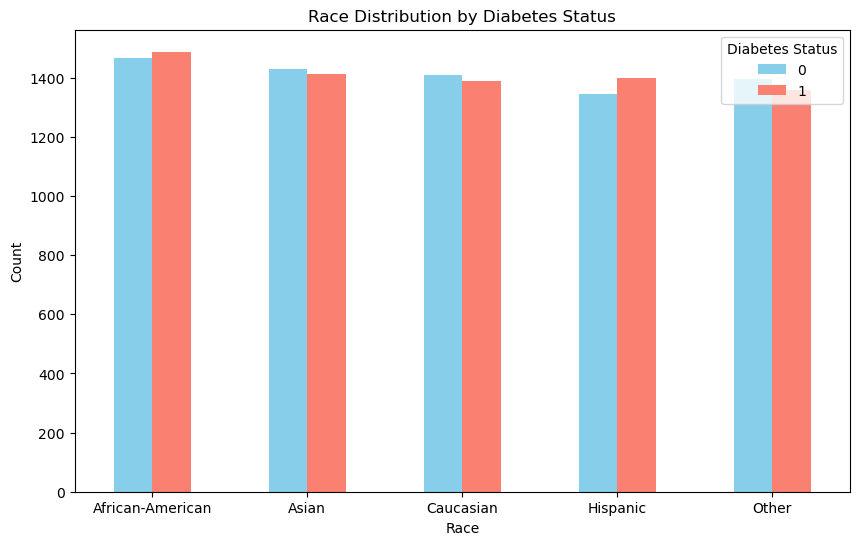

In [43]:
#Race and Diabetes Distribution
# Create a stacked bar chart
race_diabetes.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Race Distribution by Diabetes Status')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Diabetes Status')
plt.show()

* The counts for each racial group (African-American, Asian, Caucasian, Hispanic, and Other) are relatively similar, indicating a balanced representation across these categories.The data suggests that across all racial categories, there are more individuals without diabetes compared to those with diabetes. However, the differences are not drastic, indicating that diabetes prevalence may be relatively consistent across these racial groups.

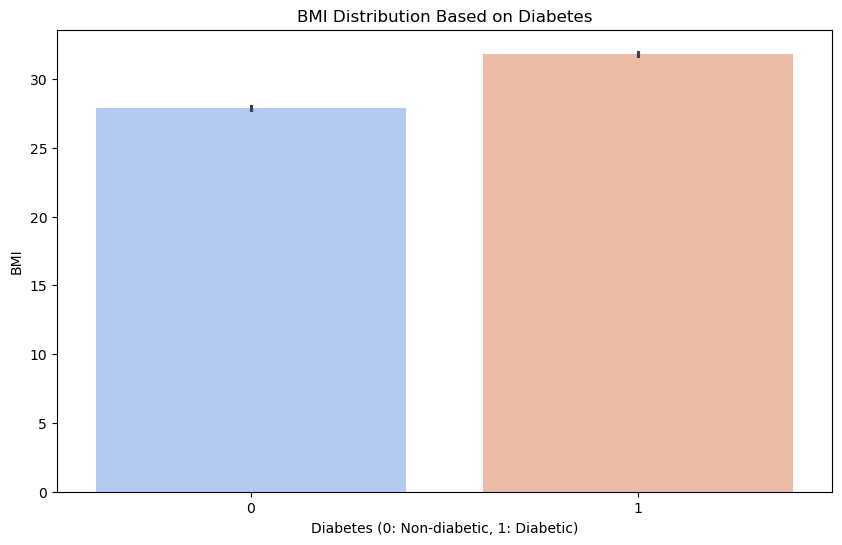

In [44]:
# BMI Distribution Based on Diabetes
plt.figure(figsize=(10, 6))
sns.barplot(x='Diabetes', y='BMI', data=d, palette='coolwarm')
plt.title('BMI Distribution Based on Diabetes')
plt.xlabel('Diabetes (0: Non-diabetic, 1: Diabetic)')
plt.ylabel('BMI')
plt.show()

* The near similarity in BMI between diabetic and non-diabetic individuals may suggest that BMI alone may not be a definitive indicator of diabetes status, or that other factors contribute to diabetes risk.

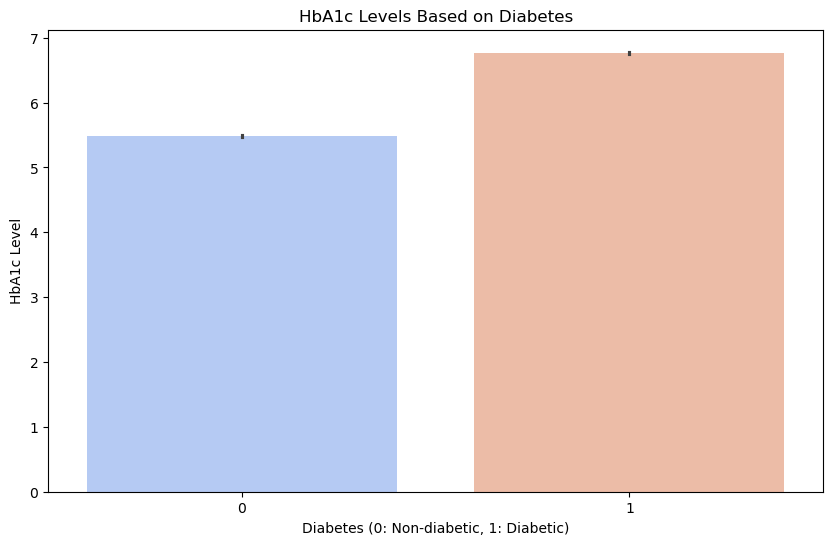

In [45]:
#HbA1c Levels Based on Diabetes
plt.figure(figsize=(10, 6))
sns.barplot(x='Diabetes', y='HbA1C Level', data=d, palette='coolwarm')
plt.title('HbA1c Levels Based on Diabetes')
plt.xlabel('Diabetes (0: Non-diabetic, 1: Diabetic)')
plt.ylabel('HbA1c Level')
plt.show()

* The average HbA1c level for non-diabetic individuals is significantly lower than that for diabetic individuals. This suggests that diabetes is associated with higher blood sugar levels over time. the non-diabetic group shows an HbA1c level around 5.5, while the diabetic group has an HbA1c level closer to 7. This indicates a clear distinction in glycemic control between the two groups.Higher HbA1c levels in diabetics can indicate poor long-term glucose control, which is associated with increased risk of diabetes-related complications.

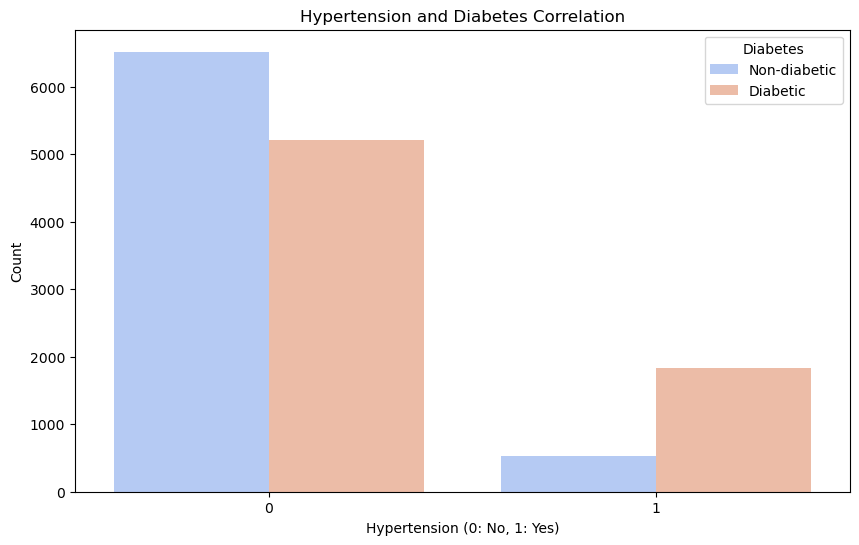

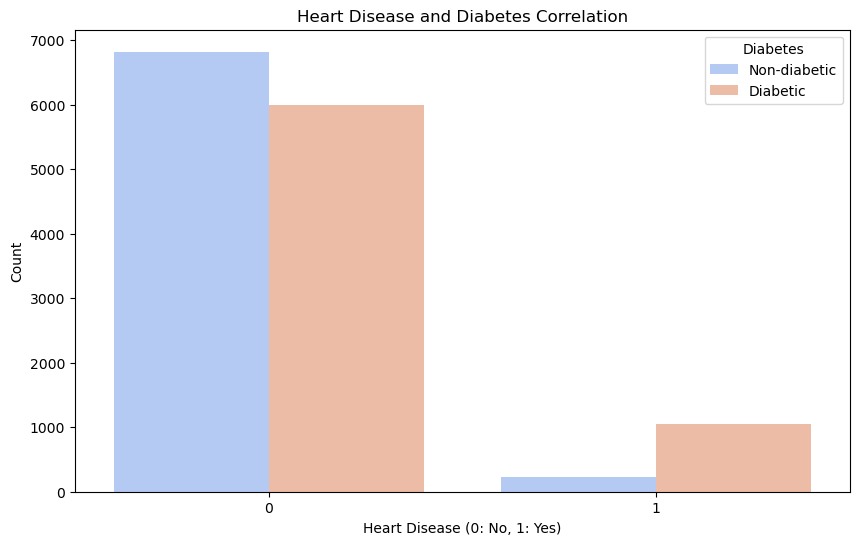

In [46]:
# hyperyension and heart disease correlation with diabetes
plt.figure(figsize=(10, 6))
sns.countplot(x='Hypertension', hue='Diabetes', data=d, palette='coolwarm')
plt.title('Hypertension and Diabetes Correlation')
plt.xlabel('Hypertension (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['Non-diabetic', 'Diabetic'])
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Heart Disease', hue='Diabetes', data=d, palette='coolwarm')
plt.title('Heart Disease and Diabetes Correlation')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['Non-diabetic', 'Diabetic'])
plt.show()

In [47]:
d.groupby(['Hypertension', 'Diabetes']).aggregate({'Hypertension': 'count'})

Hypertension
Hypertension Diabetes              
0            0                 6517
             1                 5210
1            0                  529
             1                 1836

In [48]:
d.groupby(['Heart Disease', 'Diabetes']).aggregate({'Heart Disease': 'count'})

Heart Disease
Heart Disease Diabetes               
0             0                  6822
              1                  5994
1             0                   224
              1                  1052

* Hypertension and Diabetes Correlation: The first chart shows that most non-diabetic individuals do not have hypertension, while diabetic individuals are more likely to have hypertension compared to non-diabetics as the count is still relatively high.

* Heart Disease and Diabetes Correlation: The second chart reveals a similar pattern, where most non-diabetic individuals do not have heart disease, but diabetic individuals have a higher occurrence of heart disease compared to non-diabetics.

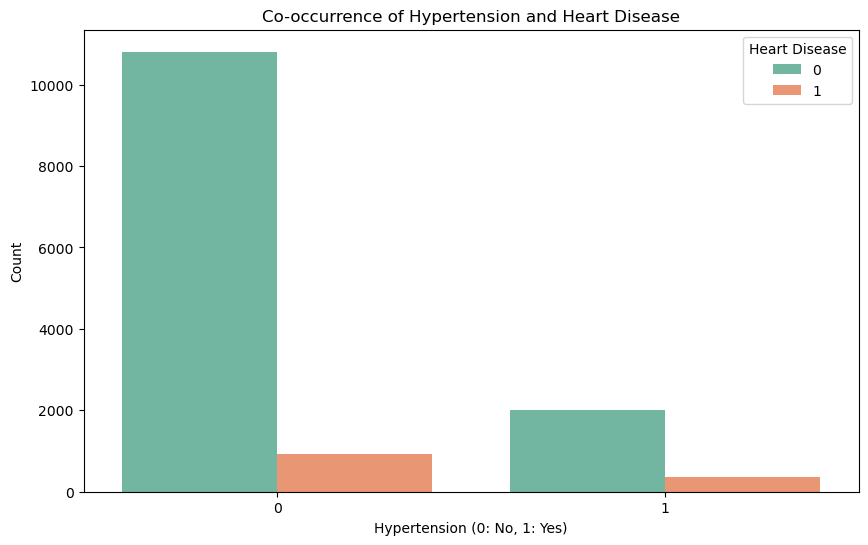

In [49]:
# Hypertension and Heart Disease Co-occurrence
plt.figure(figsize=(10, 6))
sns.countplot(x='Hypertension', hue='Heart Disease', data=d, palette='Set2')
plt.title('Co-occurrence of Hypertension and Heart Disease')
plt.xlabel('Hypertension (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()


* Most individuals without hypertension do not have heart disease.
* 
A smaller number of individuals with hypertension have heart disease, indicating that hypertension is less common among those with heart disease


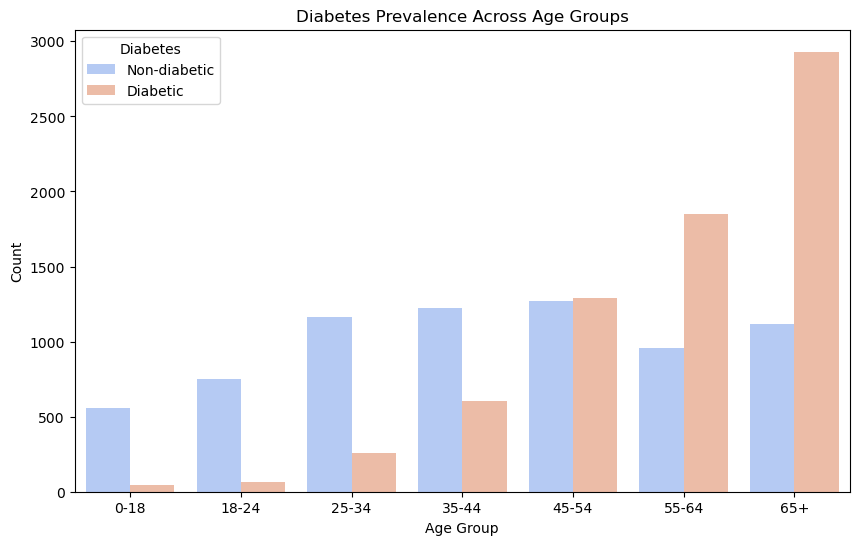

In [50]:
# Diabetes Prevalence Across Age Groups (Bar Plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', hue='Diabetes', data=d, palette='coolwarm')
plt.title('Diabetes Prevalence Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['Non-diabetic', 'Diabetic'])
plt.show()


In [51]:
d.groupby(['Age Group', 'Diabetes']).aggregate({'Age Group': 'count'})

Age Group
Age Group Diabetes           
0-18      0               559
          1                47
18-24     0               754
          1                62
25-34     0              1163
          1               261
35-44     0              1223
          1               605
45-54     0              1268
          1              1291
55-64     0               960
          1              1849
65+       0              1119
          1              2931

* The diabetic population is notably low in the younger age groups (0-18 and 18-24) but increases gradually from the 25-34 age group, indicating a potential rise in diabetes prevalence as age increases.The age group 65+ has the highest count of diabetic individuals, suggesting that this age range may be critical for diabetes management and prevention strategies.
  
* 
The 65+ age group shows a decrease in non-diabetic individuals, while the diabetic count increases as age  increase, indicating that older adults may have a higher risk of diabetesThe data suggests that diabetes prevalence increases with age, particularly after 40, highlighting the importance of monitoring and preventive measures in older populations.
* The non-diabetic count is nearly stable across age groups.

<Figure size 1200x600 with 0 Axes>

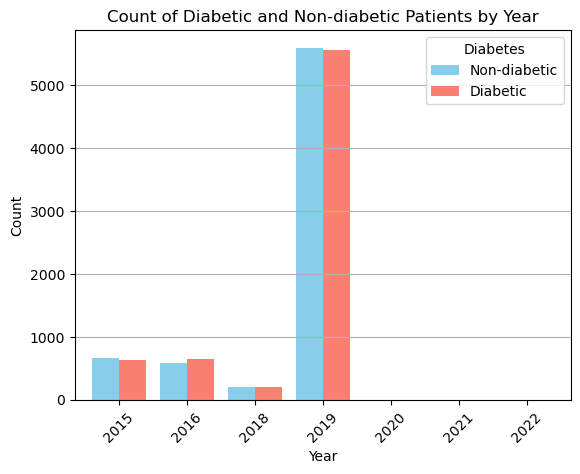

In [52]:
# Group data by year and diabetes status to get the count
yearly_diabetes = d.groupby(['Year', 'Diabetes']).size().unstack(fill_value=0)

# Plot the comparison
plt.figure(figsize=(12, 6))
yearly_diabetes.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], width=0.8)

plt.title('Count of Diabetic and Non-diabetic Patients by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Diabetes', labels=['Non-diabetic', 'Diabetic'])
plt.grid(axis='y')
plt.show()


* The year 2019 shows an exceptionally high count of non-diabetic patients , while the count of diabetic patients is nearly equal to that of the diabetic, indicating a potential spike in patient registrations or diagnoses that year.From 2015 to 2018, both diabetic and non-diabetic counts are low and consistent, suggesting stable or limited data collection or diagnosis during these years.
  
* 
The dramatic increase in 2019 contrasts sharply with the previous years, indicating a possible change in data collection methods, an increase in awareness, or a real rise in non-diabetic casesThe years 2020 to 2022 show a return to lower counts for both diabetic and non-diabetic patients, suggesting that data collection methods were affected by the covid-19 Pandemic.

In [53]:
d['Smoking History'].value_counts()

Smoking History
Never          7291
Former         2544
Current        1959
Not Current    1400
Ever            898
Name: count, dtype: int64

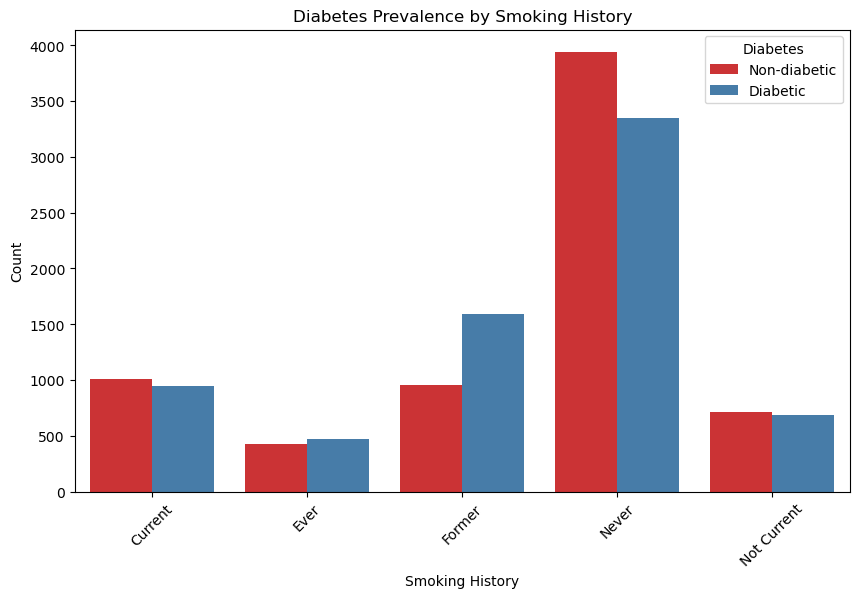

In [54]:
# Bar Plot of Diabetes Prevalence by Smoking History
plt.figure(figsize=(10, 6))
sns.countplot(data=d, x='Smoking History', hue='Diabetes', palette='Set1')
plt.title('Diabetes Prevalence by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['Non-diabetic','Diabetic'])
plt.xticks(rotation=45)
plt.show()


In [55]:
d.groupby(['Smoking History', 'Diabetes']).aggregate({'Smoking History': 'count'})

Smoking History
Smoking History Diabetes                 
Current         0                    1011
                1                     948
Ever            0                     426
                1                     472
Former          0                     954
                1                    1590
Never           0                    3945
                1                    3346
Not Current     0                     710
                1                     690

- **Highest Prevalence in Non-Smokers**: The "Never" category shows the highest count of non-diabetic individuals, indicating that those who have never smoked tend to have a lower prevalence of diabetes.

- **Current Smokers**: The "Current" smokers category has a relatively low count for both diabetic and non-diabetic individuals, suggesting that current smoking may not be as prevalent among those with diabetes.

- **Former Smokers**: The "Former" smokers category shows a notable count of both diabetic and non-diabetic individuals, indicating that those who have quit smoking may still have a significant prevalence of diabetes.

- **Overall Trends**: There is a clear trend where the prevalence of diabetes appears to be lower among those who have never smoked compared to those who have smoked at any point (current or former).mer)..

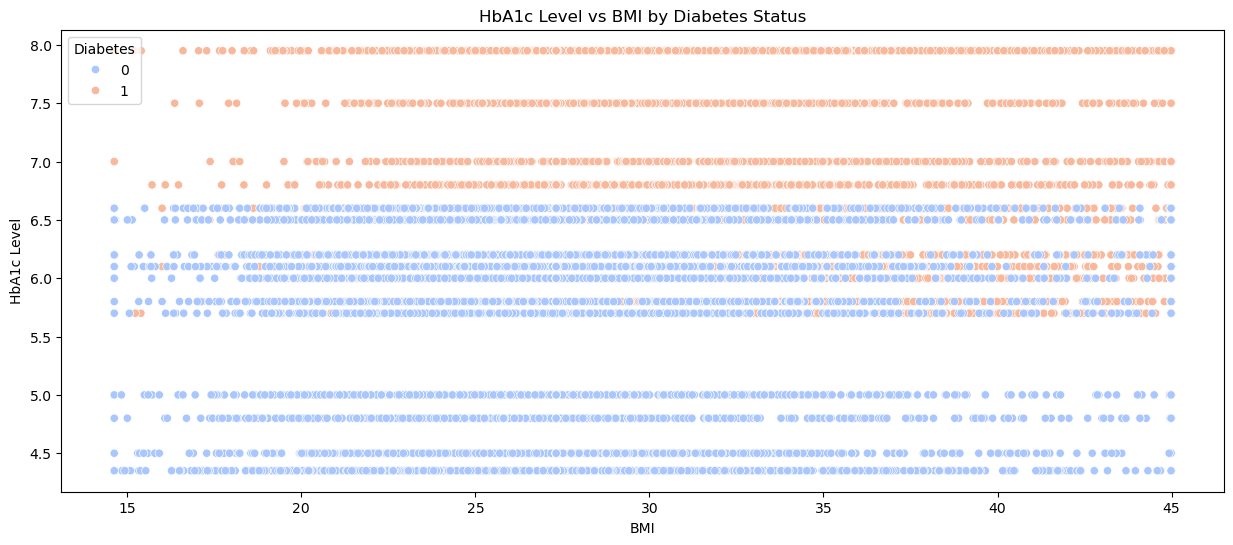

In [56]:
# Scatter Plot of HbA1c Level vs BMI
plt.figure(figsize=(15, 6))
sns.scatterplot(x='BMI', y='HbA1C Level', hue='Diabetes', data=d, palette='coolwarm')
plt.title('HbA1c Level vs BMI by Diabetes Status')
plt.xlabel('BMI')
plt.ylabel('HbA1c Level')
plt.show()


* There is some overlap in HbA1c levels between the two groups, particularly at lower BMI values. This indicates that not all individuals with higher HbA1c levels are diabetic, and some non-diabetics may also have elevated levels, as BMI increases, there is a noticeable trend where HbA1c levels tend to be higher for those with diabetes. This could imply that higher BMI is associated with worse glycemic control in diabetic individuals.


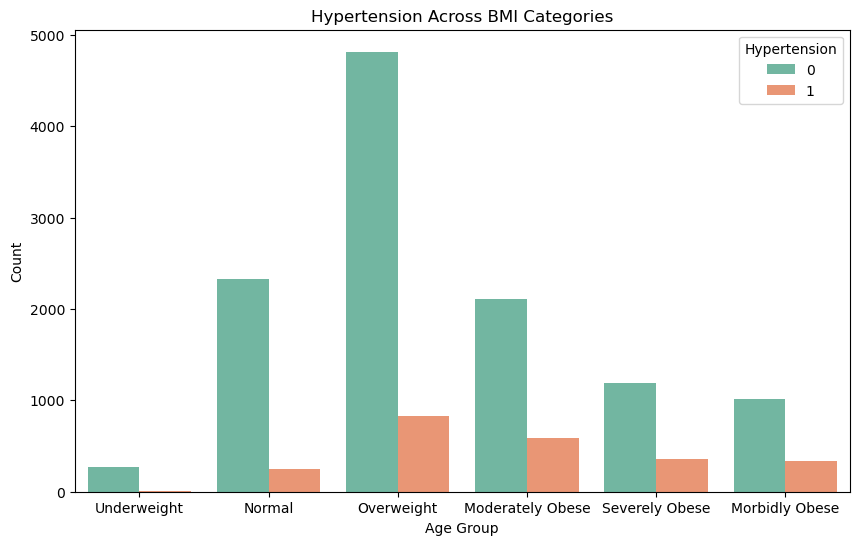

In [57]:
# Count Plot of Hypertension Across Age Groups
plt.figure(figsize=(10, 6))
sns.countplot(x='BMI Category', hue='Hypertension', data=d, palette='Set2')
plt.title('Hypertension Across BMI Categories')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Hypertension')
plt.show()


* There is a noticeable trend where the number of individuals with hypertension increases in the overweight and moderately obese categories compared to the normal and underweight categories.

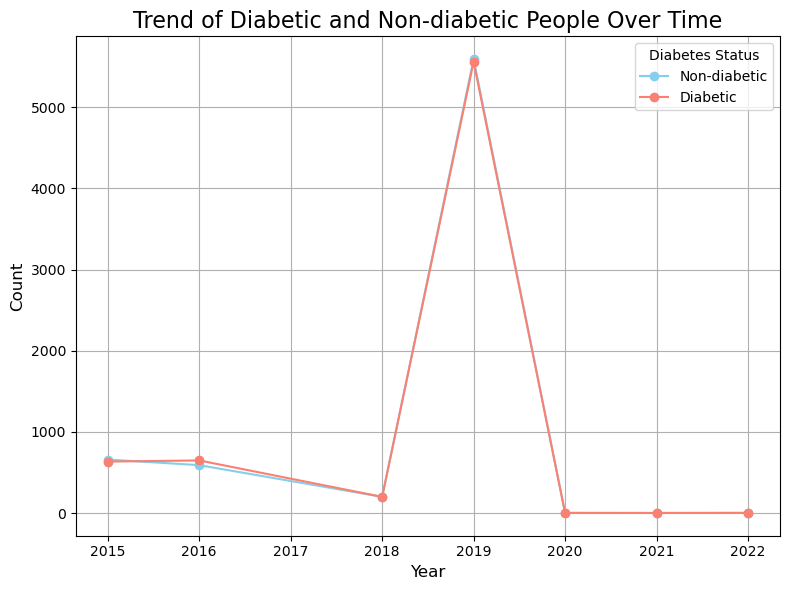

In [58]:
# Plotting Trend of Diabetic and Non-diabetic People Over Time
yearly_diabetes = d.groupby(['Year', 'Diabetes']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 6))
plt.plot(yearly_diabetes.index, yearly_diabetes[0], marker='o', linestyle='-', color='skyblue', label='Non-diabetic')
plt.plot(yearly_diabetes.index, yearly_diabetes[1], marker='o', linestyle='-', color='salmon', label='Diabetic')


plt.title('Trend of Diabetic and Non-diabetic People Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add a grid and legend
plt.grid(True)
plt.legend(title='Diabetes Status')
plt.tight_layout()

# Show the plot
plt.show()


In [59]:
yearly_diabetes = d.groupby(['Year', 'Diabetes']).size().unstack(fill_value=0)
# Display the result
print("\nYearly Diabetes Distribution:")
print(yearly_diabetes)




Yearly Diabetes Distribution:
Diabetes     0     1
Year                
2015       659   634
2016       590   648
2018       199   199
2019      5595  5561
2020         2     1
2021         0     1
2022         1     2


* There is a notable spike in the count of non-diabetic individuals in 2019. This could indicate a specific event or change in data collection methods during that year.The count of diabetic individuals remains relatively low and stable throughout the years, with only slight fluctuations.After the spike in 2019, both diabetic and non-diabetic counts show a decline, with non-diabetic numbers returning to lower levels and diabetic counts remaining consistent which indicates data collection from 2020 was affected by the covid-19 Pandemic.

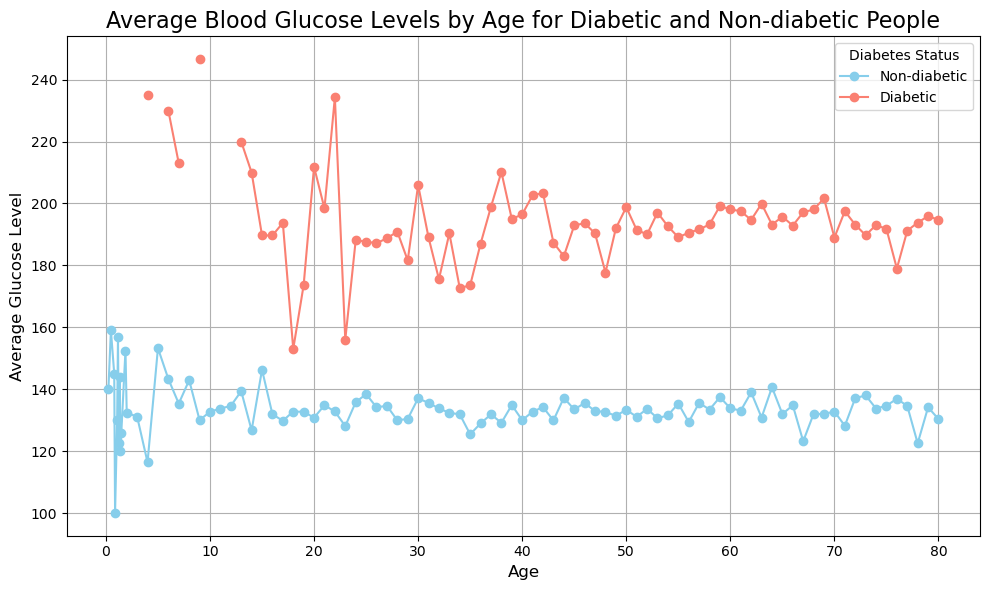

In [60]:
# Group data by age and diabetes status to get the average glucose level
age_glucose = d.groupby(['Age', 'Diabetes'])['Blood Glucose Level'].mean().unstack()

# Create a line plot for average glucose by age
plt.figure(figsize=(10, 6))
plt.plot(age_glucose.index, age_glucose[0], label='Non-diabetic', marker='o', linestyle='-', color='skyblue')
plt.plot(age_glucose.index, age_glucose[1], label='Diabetic', marker='o', linestyle='-', color='salmon')

# Set titles and labels
plt.title('Average Blood Glucose Levels by Age for Diabetic and Non-diabetic People', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Glucose Level', fontsize=12)

# Add a grid and legend
plt.grid(True)
plt.legend(title='Diabetes Status')
plt.tight_layout()

# Show the plot
plt.show()



* Diabetic individuals consistently show higher average blood glucose levels compared to non-diabetic individuals across all age groups.As age increases, the average glucose levels for both groups tend to stabilize, but the diabetic group remains significantly higher than the non-diabetic group.The average glucose levels for non-diabetic individuals remain relatively stable and low, suggesting better glucose regulation.
This highlights the importance of monitoring blood glucose levels, especially in older adults and those diagnosed with diabetes, to manage health risks associated with high glucose levels.


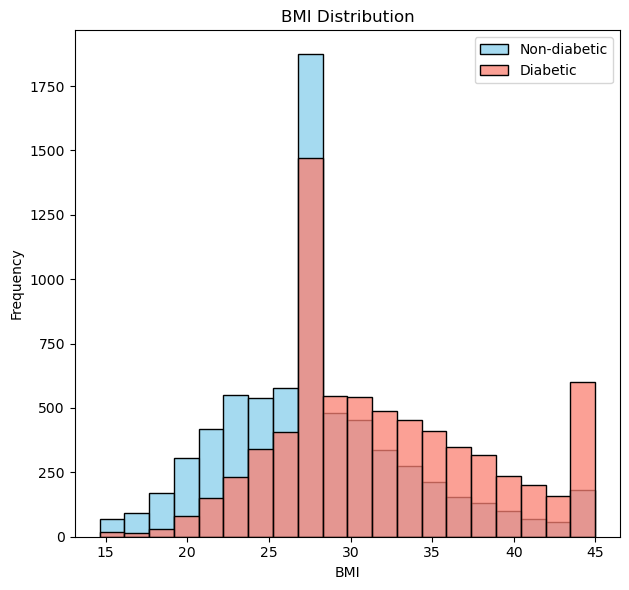

In [61]:
# BMI distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.histplot(d[d['Diabetes'] == 0]['BMI'], label='Non-diabetic', color='skyblue', bins=20)
sns.histplot(d[d['Diabetes'] == 1]['BMI'], label='Diabetic', color='salmon', bins=20)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


* The BMI values range from approximately 15 to 45, with the majority of data concentrated between 20 and 35.The peak frequency for non-diabetic individuals occurs around a BMI of 25, indicating a higher concentration of non-diabetics in this range.
Diabetic individuals show a peak frequency around a BMI of 30, suggesting that a higher BMI is associated with diabetesThere are significantly more non-diabetic individuals than diabetic individuals in the lower BMI ranges (15-25).
As BMI increases, the number of diabetic individuals rises, particularly noticeable in the 25-35 rangeThere is considerable overlap in the BMI distributions of both groups, especially around the BMI of 25-30, indicating that both non-diabetic and diabetic individuals can have similar BMI values..



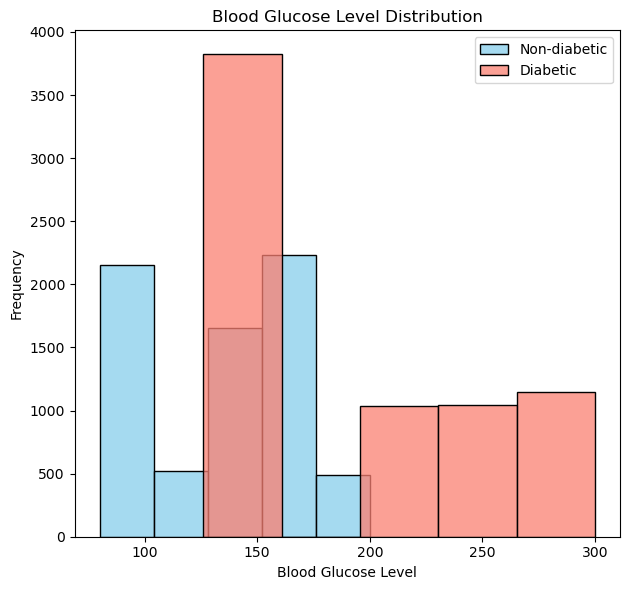

In [62]:
# Blood Glucose Level distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.histplot(d[d['Diabetes'] == 0]['Blood Glucose Level'], label='Non-diabetic', color='skyblue', bins=5)
sns.histplot(d[d['Diabetes'] == 1]['Blood Glucose Level'], label='Diabetic', color='salmon', bins=5)
plt.title('Blood Glucose Level Distribution')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


* There is a significant peak in frequency for both diabetic and non-diabetic individuals at around 150 mg/dL, indicating that this glucose level is common among both groups.The red bars (diabetic) show a higher frequency than the blue bars (non-diabetic) at the 150 mg/dL mark, suggesting that more diabetic individuals have glucose levels around this value compared to non-diabetics.The non-diabetic group has a more spread-out distribution, with noticeable frequencies at lower glucose levels (around 100 mg/dL) and fewer individuals at higher levels (above 200 mg/dL). In contrast, the diabetic group has a more concentrated distribution around the higher glucose levels.Both groups show lower frequencies at higher glucose levels (above 200 mg/dL), but the diabetic group has a slightly higher count compared to non-diabetics in this range.The data suggests that diabetic individuals tend to have higher blood glucose levels compared to non-diabetics, particularly around the 150 mg/dL mark, which may indicate a threshold for glucose levels that are more common in diabetics.

# **Diabetes Trend Analysis**

In [63]:
pst_cases = d[d['Diabetes'] == 1]
diabetes_year_counts = pst_cases['Year'].value_counts().sort_index()
diabetes_year_counts

Year
2015     634
2016     648
2018     199
2019    5561
2020       1
2021       1
2022       2
Name: count, dtype: int64

In [64]:
trends=pst_cases.groupby('Year')[['Blood Glucose Level','Age','HbA1C Level','BMI']].mean()
trends

,Blood Glucose Level,Age,HbA1C Level,BMI
Year,,,,
2015,192.000000,62.083596,6.784543,31.532650
2016,192.955247,60.094136,6.798071,32.101690
2018,186.693467,61.512563,6.866080,32.638844
2019,194.113828,61.037044,6.757526,31.813671
2020,260.000000,69.000000,6.100000,20.360000
2021,200.000000,67.000000,6.500000,27.320000
2022,210.000000,61.500000,6.825000,26.615000


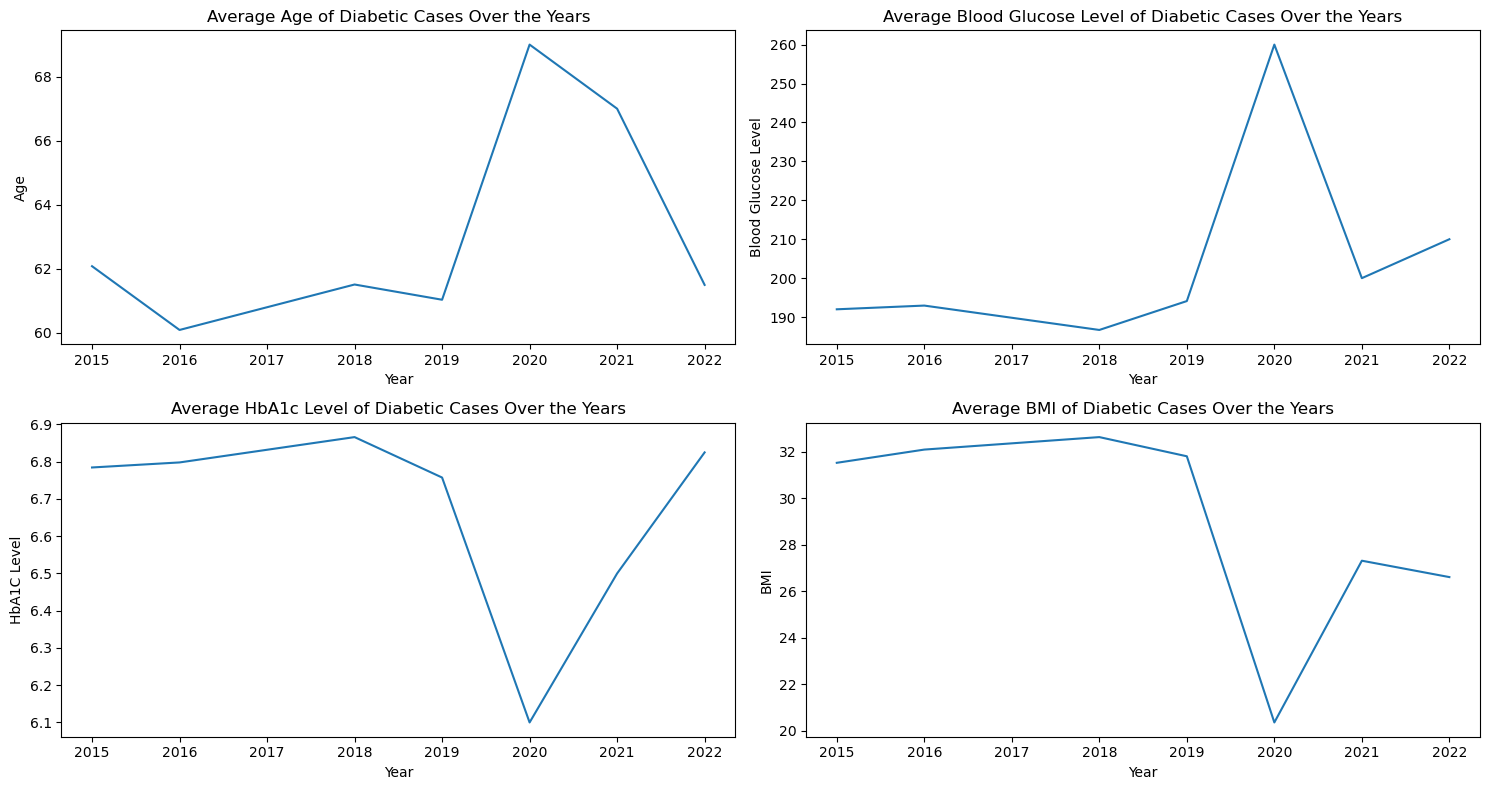

In [65]:
# Diabetes Trend analysis
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
sns.lineplot(data=trends, x=trends.index, y='Age')
plt.title("Average Age of Diabetic Cases Over the Years")

plt.subplot(2, 2, 2)
sns.lineplot(data=trends, x=trends.index, y='Blood Glucose Level')
plt.title("Average Blood Glucose Level of Diabetic Cases Over the Years")

plt.subplot(2, 2, 3)
sns.lineplot(data=trends, x=trends.index, y='HbA1C Level')
plt.title("Average HbA1c Level of Diabetic Cases Over the Years")

plt.subplot(2, 2, 4)
sns.lineplot(data=trends, x=trends.index, y='BMI')
plt.title("Average BMI of Diabetic Cases Over the Years")

plt.tight_layout()
plt.show()

## **Average Age of Diabetic Cases**
**Trend:** The average age of diabetic cases shows some fluctuations over the years. The average age started around 62 years in 2015, dropped to about 
 60 years in 2016, then gradually increased, peaking around more than 68 years betweem 2020 and 2021, before dropping again.

## **Average Blood Glucose Level of Diabetic Cases**
**Trend:** The average blood glucose level of diabetic cases shows a noticeable spike.From 2015 to 2018, the average blood glucose level remained relatively stable around 180-190 mg/dL. However, there was a sharp increase in 2019, peaking at around 260 mg/dL, followed by a decrease in 2020 and 2021, then a slight increase again in 2022.

## **Average HbA1c Level of Diabetic Cases**
**Trend:** The average HbA1c level also shows fluctuations over the years.The average HbA1c level was relatively stable from 2015 to 2017 around 6.8%. It then showed some variations, with a peak in 2018 and a dip in 2020, followed by another peak in 2022.

## **Average BMI of Diabetic Cases**
**Trend:** the average BMI of diabetic individuals remained relatively stable, around 31, until 2019, after which it began to steadily decline, dropping significantly between 2020 and 2022. This decrease could suggest that diabetic patients are becoming more health-conscious or that there are other factors leading to lower BMI in recent years.

# **Preparing the Data for Machine Learning and Building multiple models**

In [66]:
d.head(10)

,Year,Gender,Race,Age Group,Age,Location,Hypertension,Heart Disease,Smoking History,BMI Category,BMI,HbA1C Level,Blood Glucose Level,Diabetes
0,2016,Female,Other,55-64,64.0,Alabama,0,0,Ever,Morbidly Obese,44.985,7.95,140,1
1,2016,Male,African-American,65+,80.0,Alabama,0,0,Former,Overweight,29.160,7.95,140,1
2,2016,Female,Other,35-44,42.0,Alabama,0,0,Current,Overweight,27.320,7.50,130,1
3,2016,Female,Hispanic,65+,80.0,Alabama,0,1,Never,Overweight,26.000,7.50,200,1
4,2015,Female,Caucasian,65+,79.0,Alabama,0,0,Never,Moderately Obese,30.840,5.80,220,1
5,2016,Female,African-American,45-54,49.0,Alabama,0,0,Ever,Overweight,27.320,6.10,160,1
6,2016,Female,Other,45-54,54.0,Alabama,0,0,Former,Morbidly Obese,44.100,7.00,159,1
7,2016,Male,Hispanic,45-54,53.0,Alabama,0,0,Never,Overweight,27.010,6.20,280,1
8,2016,Female,African-American,35-44,39.0,Alabama,0,0,Never,Moderately Obese,32.810,6.10,155,1
9,2015,Male,Other,65+,68.0,Alabama,0,0,Former,Moderately Obese,34.280,7.00,280,1


In [67]:
d.drop(columns = ['Year', 'Location','BMI Category','Age Group','Race'], axis = 1,inplace=True)

In [68]:
d.head()

,Gender,Age,Hypertension,Heart Disease,Smoking History,BMI,HbA1C Level,Blood Glucose Level,Diabetes
0,Female,64.0,0,0,Ever,44.985,7.95,140,1
1,Male,80.0,0,0,Former,29.160,7.95,140,1
2,Female,42.0,0,0,Current,27.320,7.50,130,1
3,Female,80.0,0,1,Never,26.000,7.50,200,1
4,Female,79.0,0,0,Never,30.840,5.80,220,1


In [69]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
d['Gender']=l.fit_transform(d['Gender'])
d['Smoking History']=l.fit_transform(d['Smoking History'])

In [70]:
d.head()

,Gender,Age,Hypertension,Heart Disease,Smoking History,BMI,HbA1C Level,Blood Glucose Level,Diabetes
0,0,64.0,0,0,1,44.985,7.95,140,1
1,1,80.0,0,0,2,29.160,7.95,140,1
2,0,42.0,0,0,0,27.320,7.50,130,1
3,0,80.0,0,1,3,26.000,7.50,200,1
4,0,79.0,0,0,3,30.840,5.80,220,1


## Splitting and Training the data 

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = d.loc[:, d.columns != 'Diabetes']
y = d['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)
scaler_X = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [72]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11273, 8), (2819, 8), (11273,), (2819,))

# Function for evaluating model's performance on test dataset with Multiple Evaluation metrics for ML Models

In [73]:
from sklearn import metrics
from sklearn.metrics import average_precision_score

def evaluation(y_test, y_pred, y_pred_proba=None):
    print(f"Model Accuracy: {metrics.accuracy_score(y_test, y_pred) * 100:.2f}%")
    
    if y_pred_proba is not None:
        auc_pr = average_precision_score(y_test, y_pred_proba)
        print(f"AUC-PR Score: {auc_pr * 100:.2f}%")
    print(f"Classification Report:\n {metrics.classification_report(y_test, y_pred)}")

    cm = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap="coolwarm", fmt=".2f",xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label", fontsize=15)
    plt.ylabel("Actual Label", fontsize=15)
    plt.show()


## 1. Decision Tree

Model Accuracy: 85.46%
AUC-PR Score: 80.11%
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      1410
           1       0.85      0.86      0.86      1409

    accuracy                           0.85      2819
   macro avg       0.85      0.85      0.85      2819
weighted avg       0.85      0.85      0.85      2819



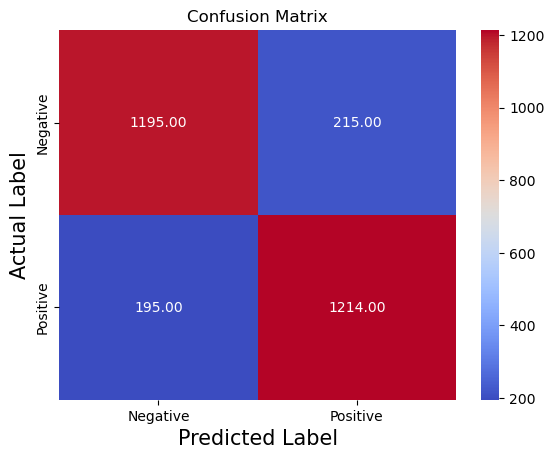

In [74]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_pred_proba = dt.predict_proba(X_test)[:, 1]
evaluation(y_test, dt_pred, dt_pred_proba)


## 2. Logistic Regression

Model Accuracy: 86.98%
AUC-PR Score: 95.79%
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      1410
           1       0.87      0.87      0.87      1409

    accuracy                           0.87      2819
   macro avg       0.87      0.87      0.87      2819
weighted avg       0.87      0.87      0.87      2819



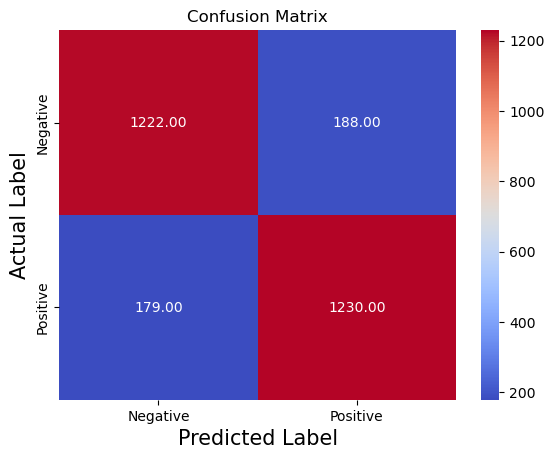

In [75]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(max_iter=10000)
logr.fit(X_train, y_train)

logr_pred = logr.predict(X_test)

logr_pred_proba = logr.predict_proba(X_test)[:, 1]
evaluation(y_test, logr_pred, logr_pred_proba)


## 3. Random forest

Model Accuracy: 88.75%
AUC-PR Score: 96.85%
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      1410
           1       0.89      0.89      0.89      1409

    accuracy                           0.89      2819
   macro avg       0.89      0.89      0.89      2819
weighted avg       0.89      0.89      0.89      2819



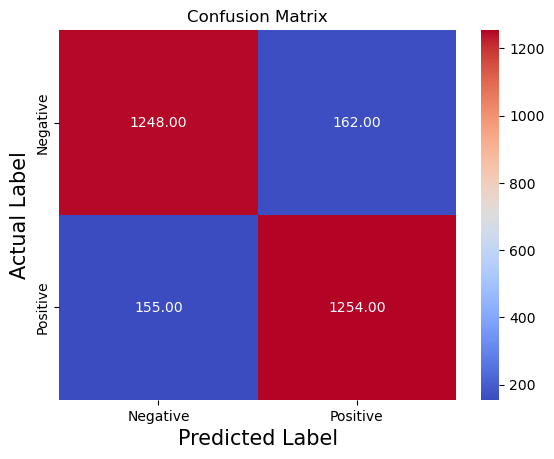

In [76]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_pred_proba = rf.predict_proba(X_test)[:, 1]

evaluation(y_test, rf_pred, rf_pred_proba)


## 4. XG Boost

Model Accuracy: 88.75%
AUC-PR Score: 97.06%
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      1410
           1       0.88      0.90      0.89      1409

    accuracy                           0.89      2819
   macro avg       0.89      0.89      0.89      2819
weighted avg       0.89      0.89      0.89      2819



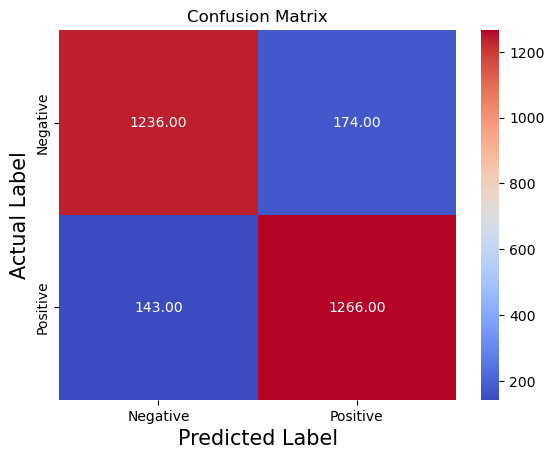

In [77]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_pred_proba = xgb.predict_proba(X_test)[:, 1]
evaluation(y_test, xgb_pred,xgb_pred_proba)

## 5. K-Nearest Neigbours

Model Accuracy: 82.62%
AUC-PR Score: 89.46%
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83      1410
           1       0.85      0.80      0.82      1409

    accuracy                           0.83      2819
   macro avg       0.83      0.83      0.83      2819
weighted avg       0.83      0.83      0.83      2819



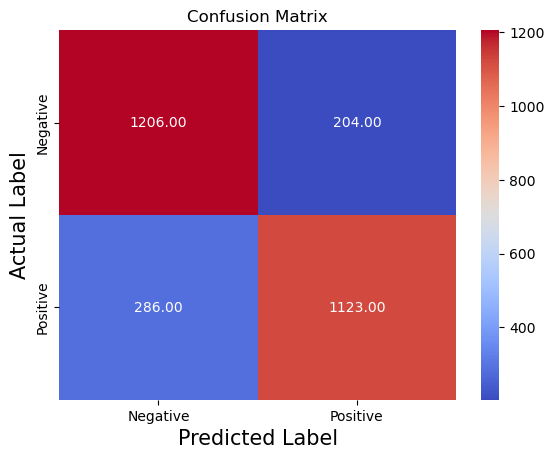

In [78]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_pred_proba = knn.predict_proba(X_test)[:, 1]
evaluation(y_test, knn_pred,knn_pred_proba)


## 6. Naive Bayes

Model Accuracy: 84.25%


AUC-PR Score: 91.45%
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85      1410
           1       0.88      0.79      0.83      1409

    accuracy                           0.84      2819
   macro avg       0.85      0.84      0.84      2819
weighted avg       0.85      0.84      0.84      2819



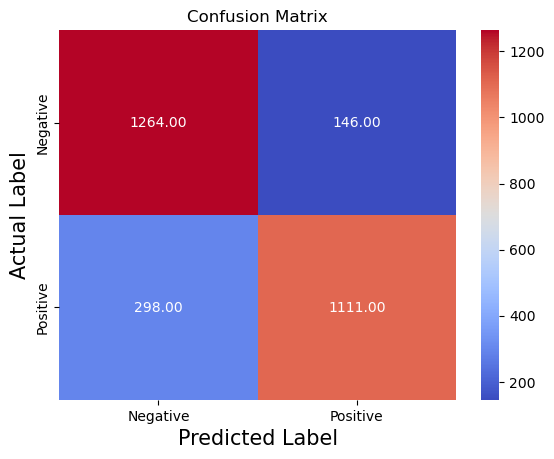

In [79]:
from sklearn.naive_bayes import GaussianNB


nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_pred_proba = nb.predict_proba(X_test)[:, 1]

evaluation(y_test, nb_pred,nb_pred_proba)


## 7. Gradient Boost

Model Accuracy: 89.89%
AUC-PR Score: 97.47%
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90      1410
           1       0.89      0.92      0.90      1409

    accuracy                           0.90      2819
   macro avg       0.90      0.90      0.90      2819
weighted avg       0.90      0.90      0.90      2819



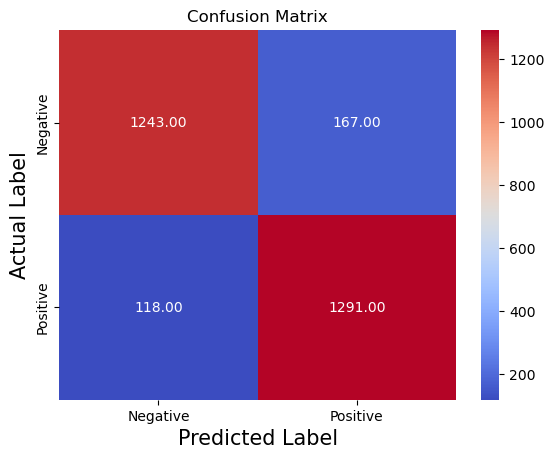

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_pred_proba = gb.predict_proba(X_test)[:, 1]
evaluation(y_test, gb_pred,gb_pred_proba)

# Comparing accuracy metrics

In [81]:
models = {
    'Decision Tree': dt,
    'Naive Bayes': nb,
    'Random Forest': rf,  
    'KNN': knn,
    'Logistic Regression': logr,
    'Gradient boost':gb,
    'XGBoost': xgb
}

In [82]:
from sklearn.metrics import average_precision_score, accuracy_score, precision_score, recall_score, f1_score

for model_name, model in models.items():
    
    model.fit(X_train, y_train)
    
    # Predict probabilities for the positive class
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Predict class labels
    y_pred = model.predict(X_test)

    # Calculate metrics
    auc_pr = average_precision_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the results in a formatted way
    print(f"{model_name}:")
    print(f"  AUC-PR Score: {auc_pr * 100:.2f}%")
    print(f"  Accuracy: {accuracy * 100:.2f}%")
    print(f"  Precision: {precision * 100:.2f}%")
    print(f"  Recall: {recall * 100:.2f}%")
    print(f"  F1 Score: {f1 * 100:.2f}%")
    print("-" * 40)

Decision Tree:
  AUC-PR Score: 80.37%
  Accuracy: 85.67%
  Precision: 85.16%
  Recall: 86.37%
  F1 Score: 85.76%
----------------------------------------
Naive Bayes:
  AUC-PR Score: 91.45%
  Accuracy: 84.25%
  Precision: 88.39%
  Recall: 78.85%
  F1 Score: 83.35%
----------------------------------------
Random Forest:
  AUC-PR Score: 96.79%
  Accuracy: 88.44%
  Precision: 87.89%
  Recall: 89.14%
  F1 Score: 88.51%
----------------------------------------
KNN:
  AUC-PR Score: 89.46%
  Accuracy: 82.62%
  Precision: 84.63%
  Recall: 79.70%
  F1 Score: 82.09%
----------------------------------------
Logistic Regression:
  AUC-PR Score: 95.79%
  Accuracy: 86.98%
  Precision: 86.74%
  Recall: 87.30%
  F1 Score: 87.02%
----------------------------------------
Gradient boost:
  AUC-PR Score: 97.47%
  Accuracy: 89.89%
  Precision: 88.55%
  Recall: 91.63%
  F1 Score: 90.06%
----------------------------------------
XGBoost:
  AUC-PR Score: 97.06%
  Accuracy: 88.75%
  Precision: 87.92%
  Recall: 

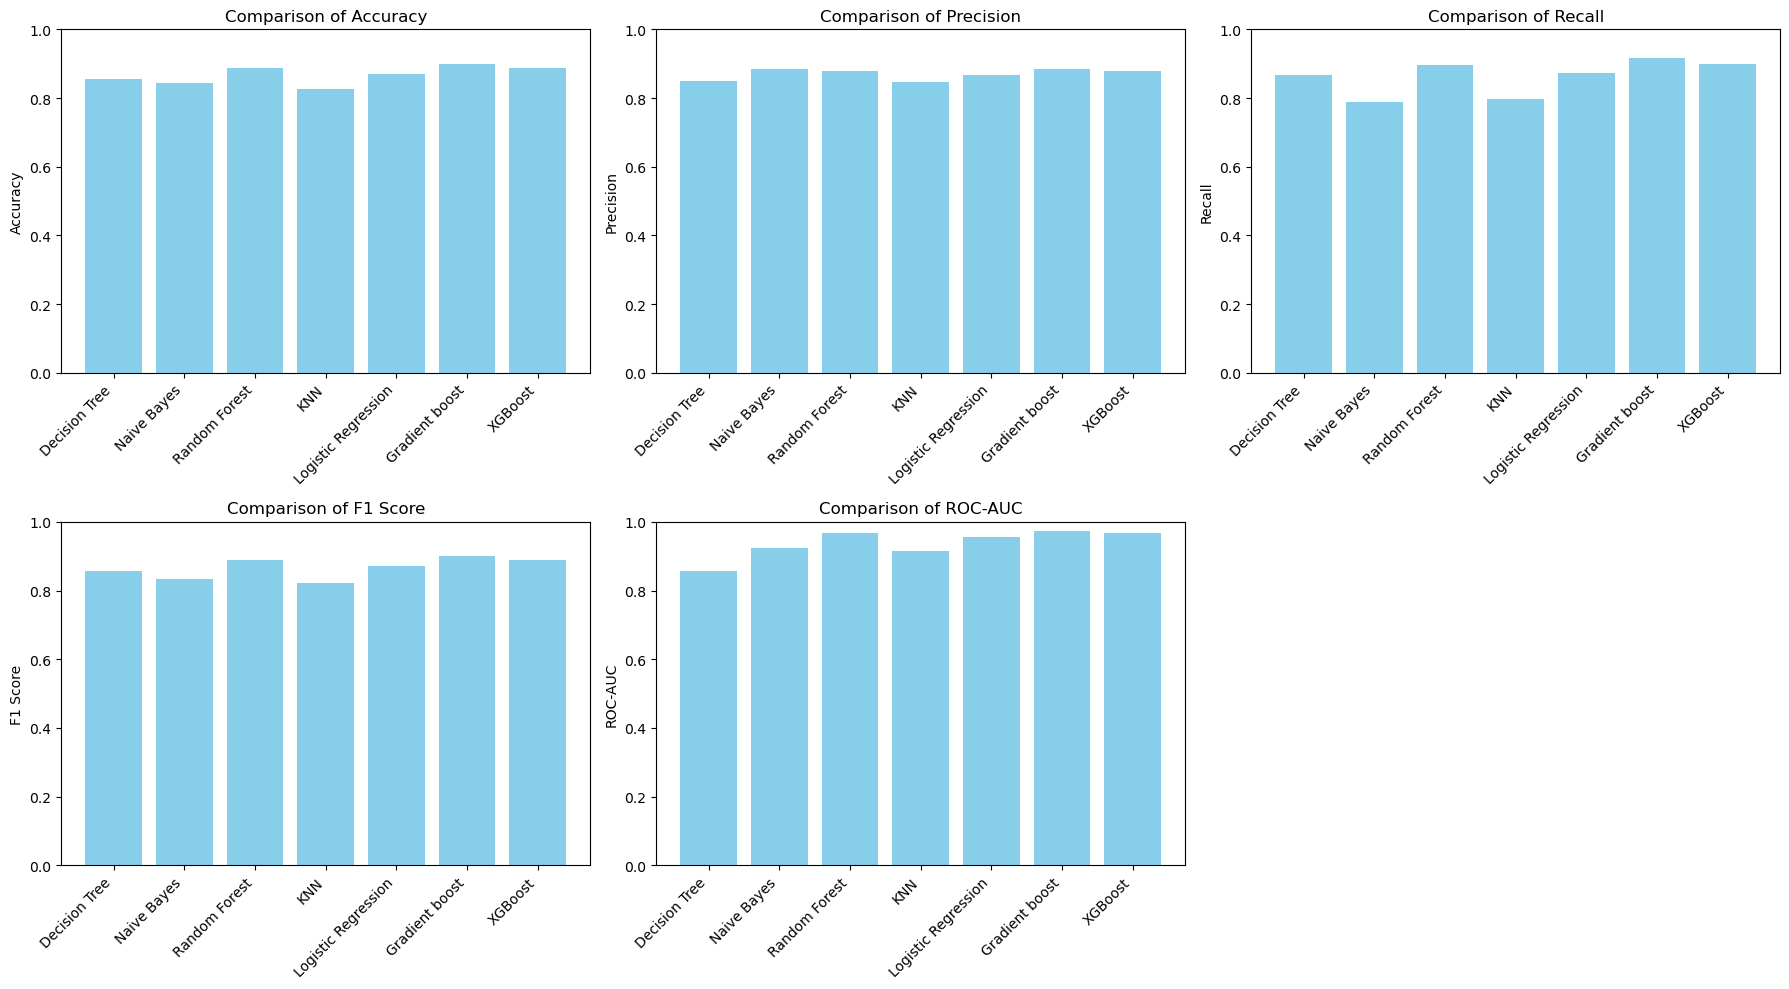

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities for the positive class
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Predict class labels
    y_pred = model.predict(X_test)

    # Calculate metrics
    auc_pr = average_precision_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Store the results in a dictionary
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc,
        'AUC-PR': auc_pr
    }

# Collect the metrics for visualization
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']
model_names = list(results.keys())

# Prepare data for each metric
metrics_data = {metric: [results[model][metric] for model in model_names] for metric in metric_names}

# Plot a bar chart for each metric
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.ravel()

# Loop through the metrics and plot them
for i, metric in enumerate(metric_names):
    axs[i].bar(model_names, metrics_data[metric], color='skyblue')
    axs[i].set_title(f'Comparison of {metric}')
    axs[i].set_ylabel(metric)
    axs[i].set_ylim(0, 1)  # Set y-axis limits for better comparison
    axs[i].set_xticklabels(model_names, rotation=45, ha='right')

# Remove the empty chart if there are less than 6 metrics
if len(metric_names) < 6:
    fig.delaxes(axs[5])

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

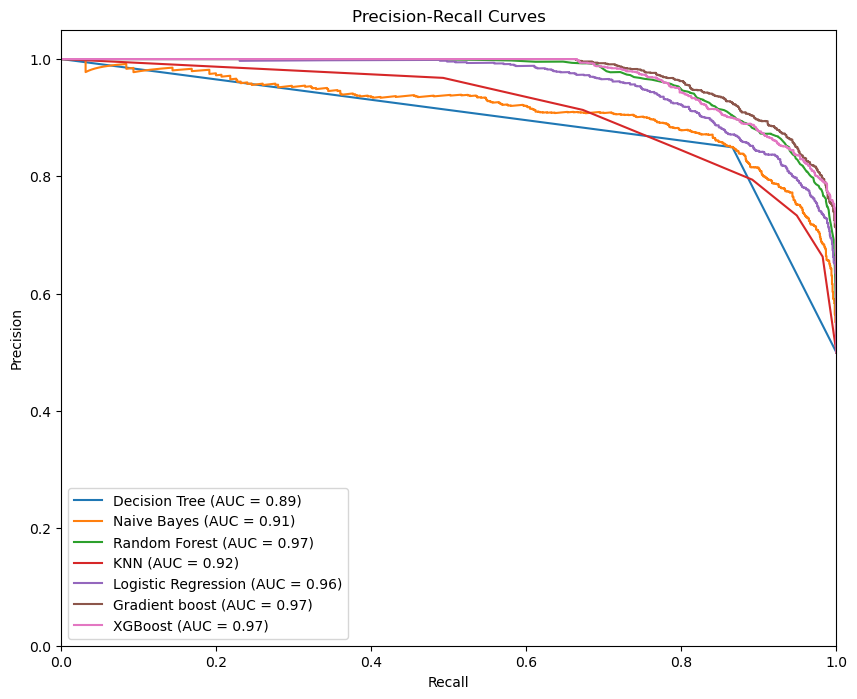

In [84]:
from sklearn.metrics import precision_recall_curve, auc

plt.figure(figsize=(10, 8))

# Plot Precision-Recall curve for each model
for name, model in models.items():
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f'{name} (AUC = {pr_auc:.2f})')

# Set plot boundaries and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='lower left')
plt.show()


* AUC-PR is a measure of the overall performance of a classification model. It is the area under the precision-recall curve, which represents the average precision at different recall levels. A higher AUC-PR indicates better performance.The AUC-PR is a more suitable metric than the AUC-ROC when dealing with imbalanced datasets, where the number of positive and negative examples is significantly different. This is because AUC-ROC can be misleading in such cases, as it may give a high score even if the model performs poorly on the minority class.

* The Gradient boost model is the best performing model for the diabetes classification